<a href="https://colab.research.google.com/github/Jake0925/DeepLearning/blob/master/SoftMax_FashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print('train_images_shape: ', train_images.shape) # 60000개의 이미지가 28X28크기의 픽셀에 그려져 있다
print('test_images_shape: ', test_images.shape)
print('train_label: ', train_labels)
print('test_label: ', test_labels)

4423680/4422102 [==============================] - 0s 0us/step
train_images_shape:  (60000, 28, 28)
test_images_shape:  (10000, 28, 28)
train_label:  [9 0 0 ... 3 0 5]
test_label:  [9 2 1 ... 8 1 5]


In [ ]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

데이터 전처리

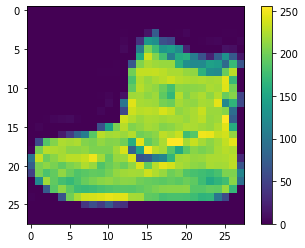

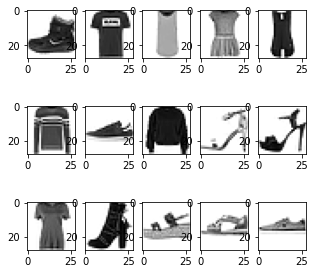

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

plt.figure(figsize=(5,5))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
# 데이터 정규화
# 신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정하겠습니다. 이렇게 하려면 255로 나누어야 합니다

train_images = train_images / 255.0
test_images = test_images / 255.0

모델구성

In [ ]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)), # 2차원 배열이미지를 1차원 배열로 펴준다
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')   
                         ])

모델컴파일

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

모델학습

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6208 - accuracy: 0.7856
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3860 - accuracy: 0.8590
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3354 - accuracy: 0.8780
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3195 - accuracy: 0.8836
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2857 - accuracy: 0.8928


정확도 평가

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy: ', test_acc)

313/313 - 0s - loss: 0.3445 - accuracy: 0.8784
Test accuracy:  0.8784000277519226


예측만들기

[7.8732000e-06 5.6995994e-08 7.2903333e-07 1.9353917e-07 1.3392962e-06
 6.4674551e-03 7.8590292e-06 1.4506972e-01 5.8709618e-05 8.4838605e-01]
최대값 Index:  9


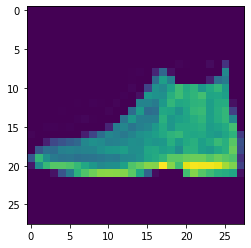

In [ ]:
prediction = model.predict(test_images)
print(prediction[0]) # 0번 이미지에대한 각 출력값들의 예상값
print('최대값 Index: ',np.argmax(prediction[0])) # 최대값을 갖는 배열위치값

plt.imshow(test_images[0])

10개 클래스에 대한 예측을 모두 그래프로 표현

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions)
  print('Result label: ', predicted_label)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([]) 
  plt.ylim([0, 1])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  
  # 예측값은 파란색으로 실제값은 빨간색 막대표시
  predicted_label = np.argmax(predictions_array) 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

1번 이미지 결과

Result label:  2


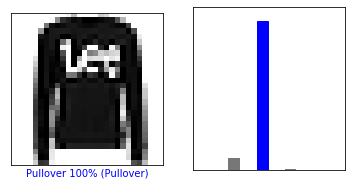

In [ ]:
index = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index, prediction, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,prediction, test_labels)
plt.show()

Result label:  5


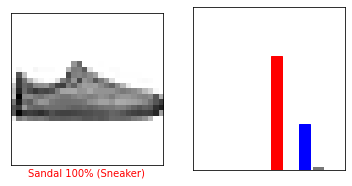

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction,  test_labels)
plt.show()

Result label:  9
Result label:  2
Result label:  1
Result label:  1
Result label:  6
Result label:  1
Result label:  4
Result label:  6
Result label:  5
Result label:  7
Result label:  4
Result label:  5
Result label:  5
Result label:  3
Result label:  4


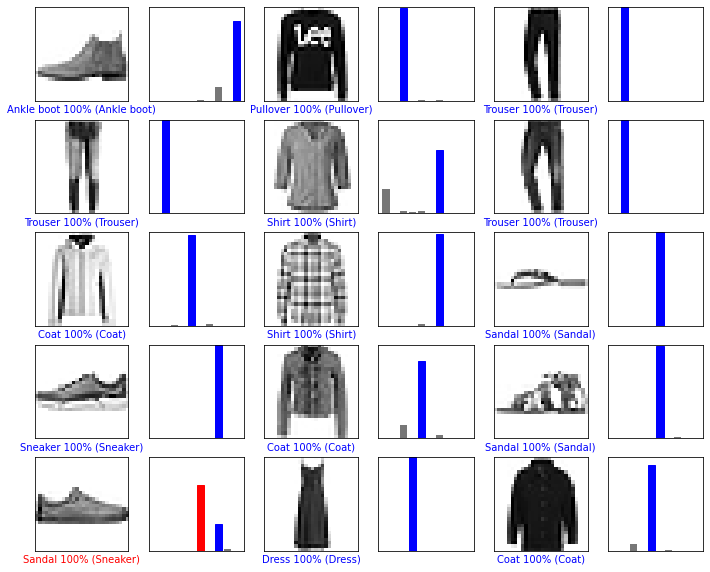

In [ ]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction, test_labels)
plt.show()

# 학습된 모델을 이용하여 임의의 한개의 이미지 테스트하기

In [ ]:
TestImg = test_images[100]
print(TestImg.shape)


#tf.keras` 모델은 한 번에 샘플의 묶음 또는 *배치*(batch)로 예측을 만드는데 최적화되어있다
# 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야한다
TestImg = (np.expand_dims(TestImg,0))
print(TestImg.shape)

probability = model.predict(TestImg)
print(probability)
Result = np.argmax(probability)
print('Result: ', Result)

(28, 28)
(1, 28, 28)
[[7.8777265e-04 2.2879383e-05 7.8018056e-06 9.9884558e-01 8.8373254e-06
  4.0823062e-07 3.2281800e-04 2.2485704e-10 3.6368442e-06 1.4776465e-07]]
Result:  3
